In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

In [9]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '80e81f7b-4a53-47b0-9ad1-cdbe4d7e9245'
resource_group = 'trial'
workspace_name = 'aml_trial'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='climateghange')
df = dataset.to_pandas_dataframe()

In [21]:
df = df.rename(columns={"Column1": "yearsBase", 
                        "Column2": "meanBase"})

In [23]:
print(df.yearsBase)

0      1882
1      1883
2      1884
3      1885
4      1886
       ... 
128    2010
129    2011
130    2012
131    2013
132    2014
Name: yearsBase, Length: 133, dtype: int64


In [28]:
yearsBase = df.yearsBase
meanBase = df.meanBase

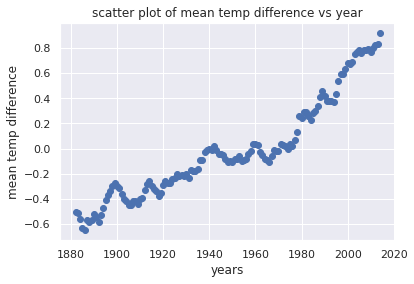

In [29]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

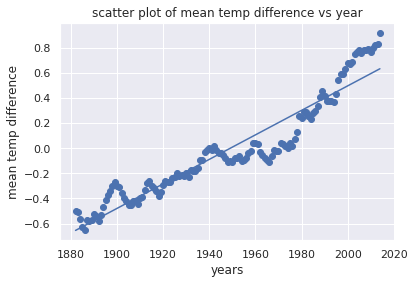

 y = 0.009754083308678737 * x + -19.011480601095652


In [30]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

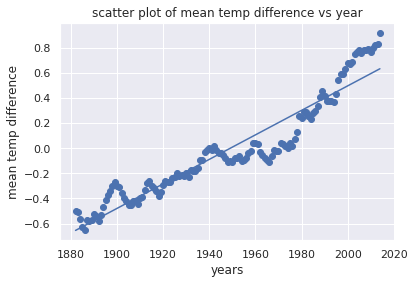

 y = 0.009754083308678755 * x + -19.011480601095688


In [31]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


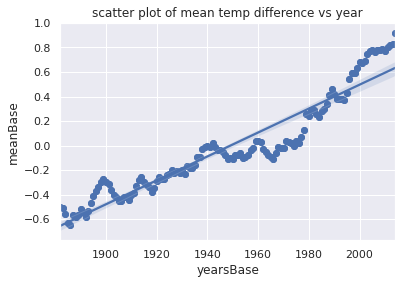

In [33]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()